# Predictive Analytics of Breast Cancer Data
### Automating Medical Diagnosis with Machine Learning
A private project by Markus Ullenbruch

In this project we want to predict the outcome of a diagnosis based on numeric CT-scan features. We try different Machine Learning models tp predict the diagnosis.

Dataset can be found at: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

### 0. Data Information

1. ID number
2. Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

### 1. Load and Understanding the Data
1. Import the Data using pandas
2. Understand the structure and distribution of the Data
3. Show a correlation matrix and select relevant features

In [2]:
# Overview of the data
data = pd.read_csv('data_breast_cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
print(data.shape)
print('Total Data Samples', data.shape[0])
print('Total features', data.shape[1])

(569, 33)
Total Data Samples 569
Total features 33


In [4]:
# Statistical information about the features
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
print('NaN in Dataset ', data.isnull().values.any())
data.isnull().sum()

NaN in Dataset  True


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
# Drop "Unnamed: 32" column and all NaN Values
data.drop(['Unnamed: 32'], axis=1, inplace=True)
data.drop(['id'], axis=1, inplace=True)

In [8]:
print('Nan in Data: ', data.isnull().values.any())

Nan in Data:  False


In [9]:
data.loc[data.duplicated()]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


### 2. Visualization of the Data & Feature Selection

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

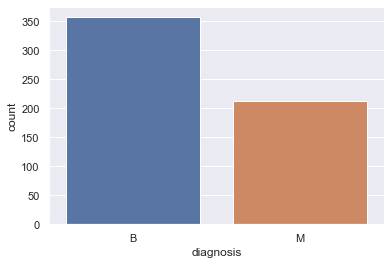

In [10]:
sns.countplot(x='diagnosis', data=data, order = data['diagnosis'].value_counts().index)

In [11]:
set(data.diagnosis.values)

{'B', 'M'}

In [12]:
# convert categorical data to numeric data
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

In [13]:
set(data.diagnosis.values)

{0, 1}

In [14]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
def plot_hist(key):
    '''Plot Histplot of key and scatterplot of key vs diagnosis'''
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.title(key +' Histogram')
    sns.histplot(data[key], kde=True)
    plt.subplot(1,2,2)
    plt.title(key +' vs diagnosis')
    sns.scatterplot(x=data[key], y=data['diagnosis'], hue=data['diagnosis'])
    plt.show()

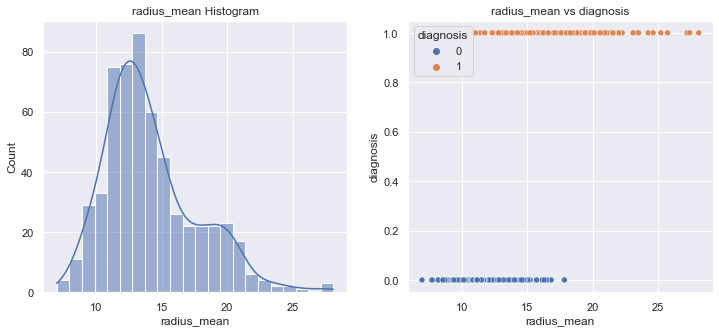

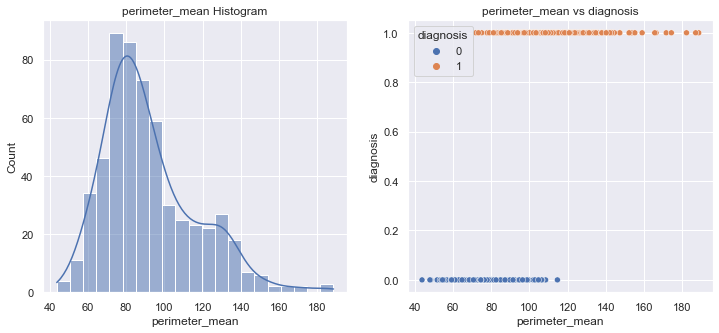

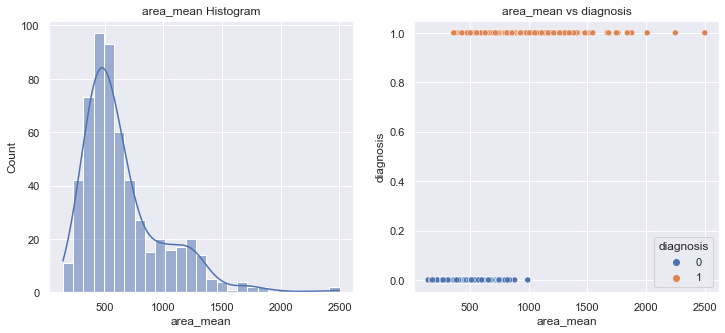

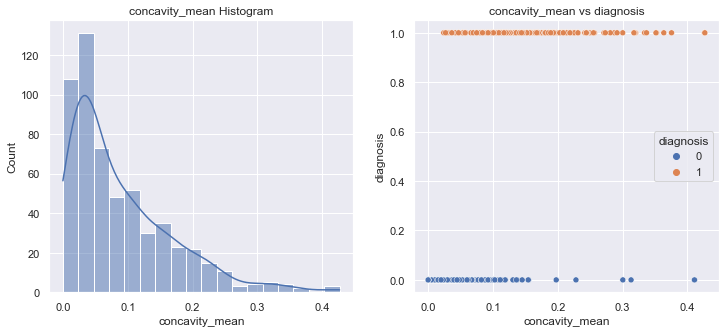

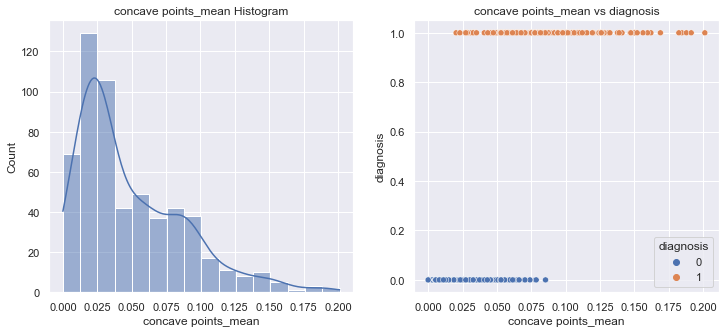

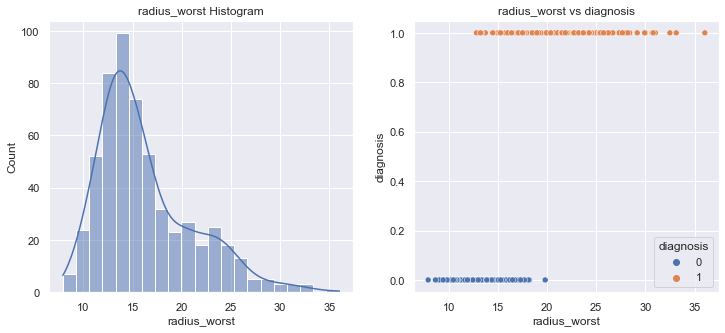

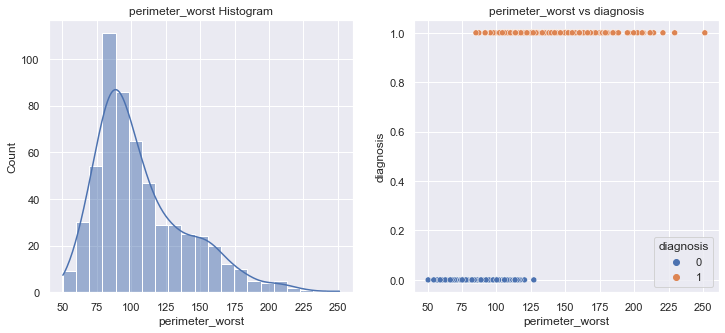

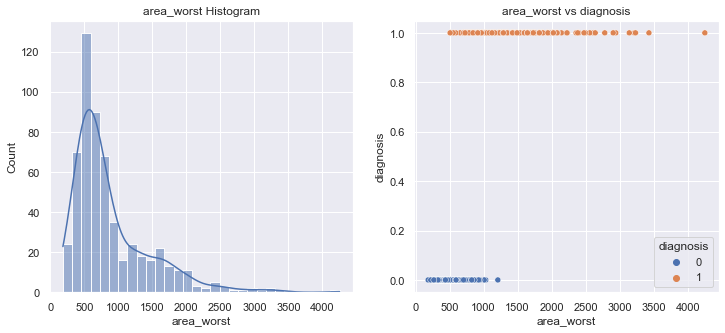

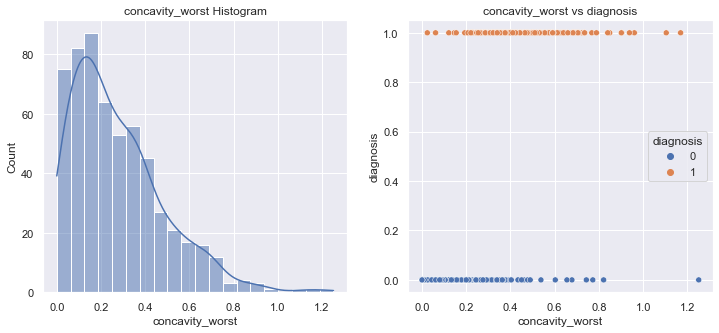

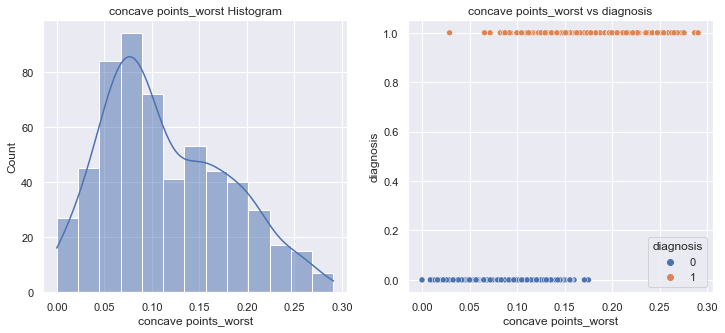

In [16]:
plot_hist('radius_mean')
plot_hist('perimeter_mean')
plot_hist('area_mean')
plot_hist('concavity_mean')
plot_hist('concave points_mean')


plot_hist('radius_worst')
plot_hist('perimeter_worst')
plot_hist('area_worst')
plot_hist('concavity_worst')
plot_hist('concave points_worst')

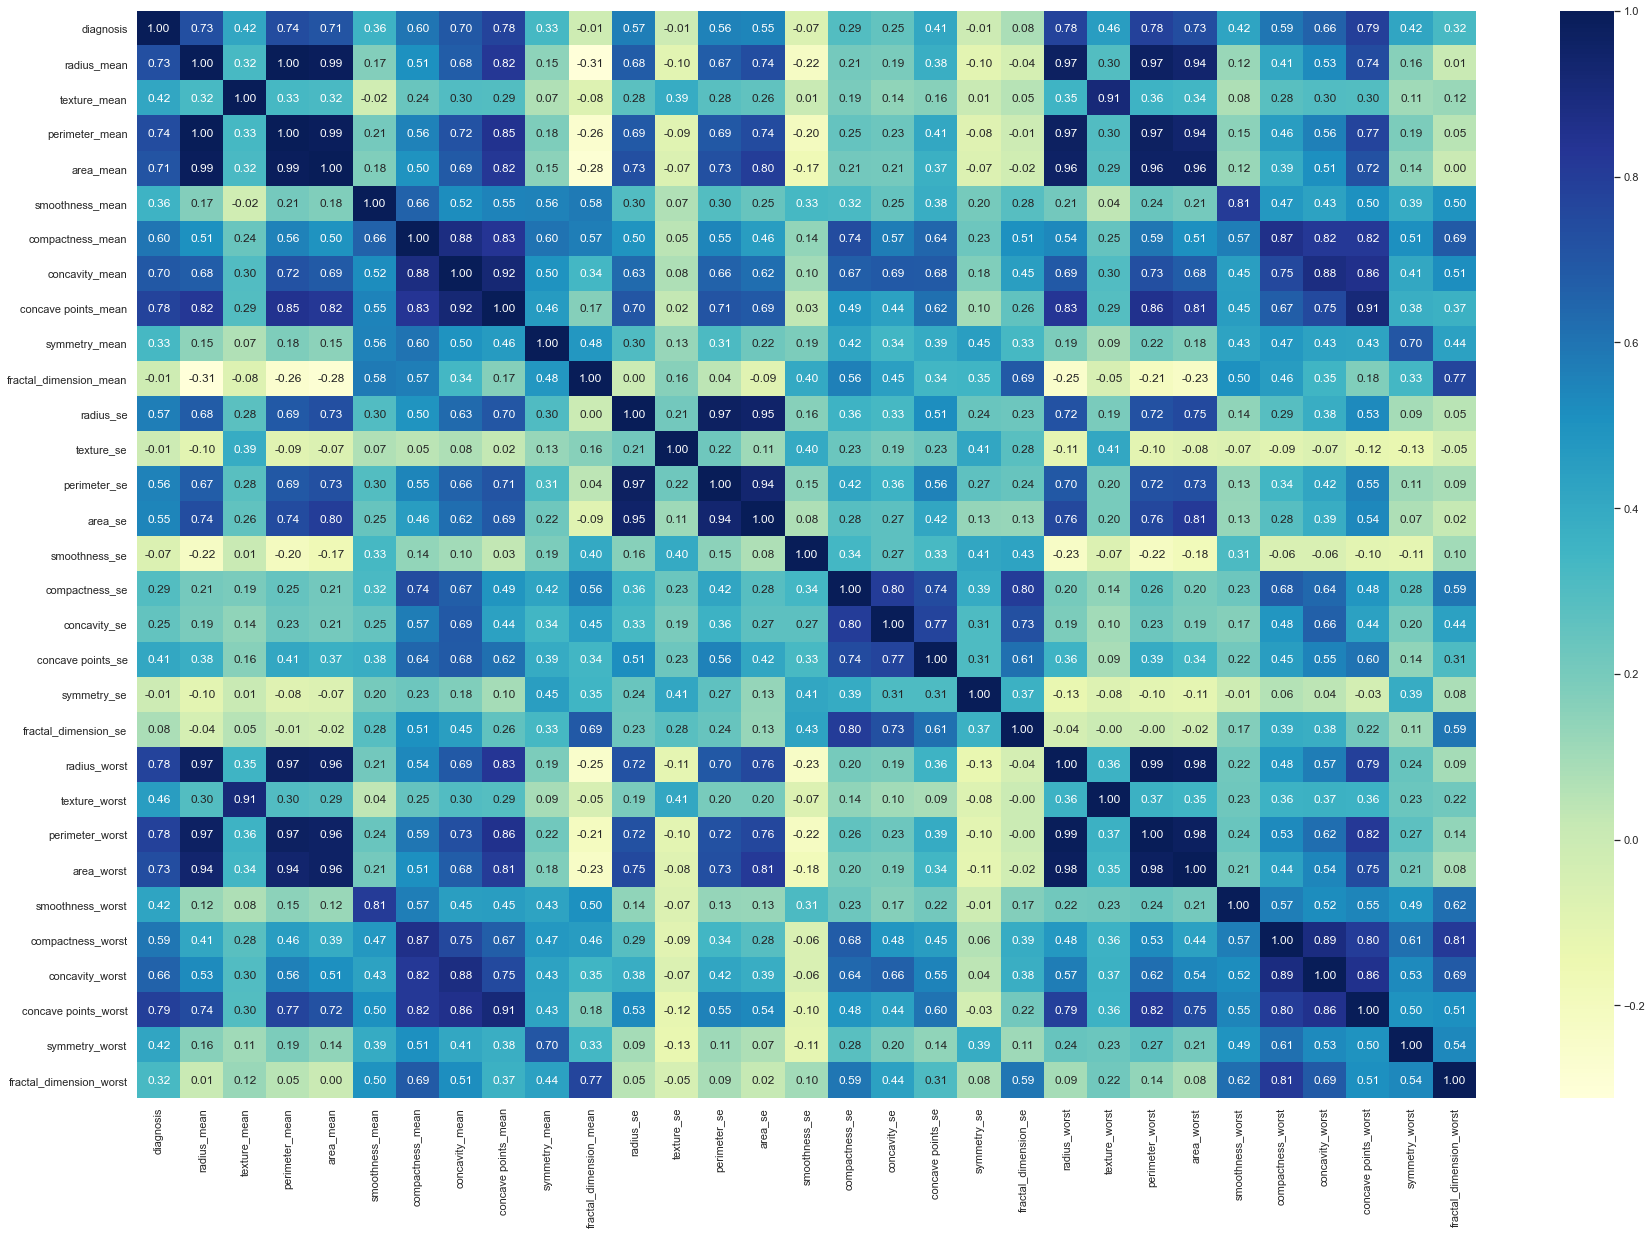

In [17]:
corr_mat = data.corr()
plt.figure(figsize =(30,20))
sns.heatmap(corr_mat, annot = True, fmt = ".2f", cmap="YlGnBu")
plt.show()

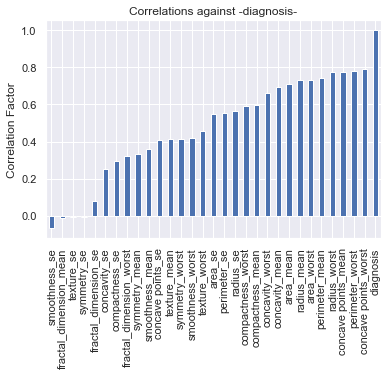

In [18]:
corr_mat['diagnosis'].sort_values().plot(kind='bar')
plt.title('Correlations against -diagnosis-')
plt.ylabel('Correlation Factor')
plt.show()

In [19]:
threshold = 0.6
filters = np.abs(corr_mat['diagnosis']) > threshold
print('correlation feature with -diagnosis- greater threshold?', filters)
corr_features = corr_mat.columns[filters].tolist()
print('Highest Correlation features: ', corr_features)

correlation feature with -diagnosis- greater threshold? diagnosis                   True
radius_mean                 True
texture_mean               False
perimeter_mean              True
area_mean                   True
smoothness_mean            False
compactness_mean           False
concavity_mean              True
concave points_mean         True
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst                True
texture_worst              False
perimeter_worst             True
area_worst                  True
smoothness_worst           False
compactness_worst          False
concavity_worst             True
concave points_worst

In [20]:
data = data[corr_features]

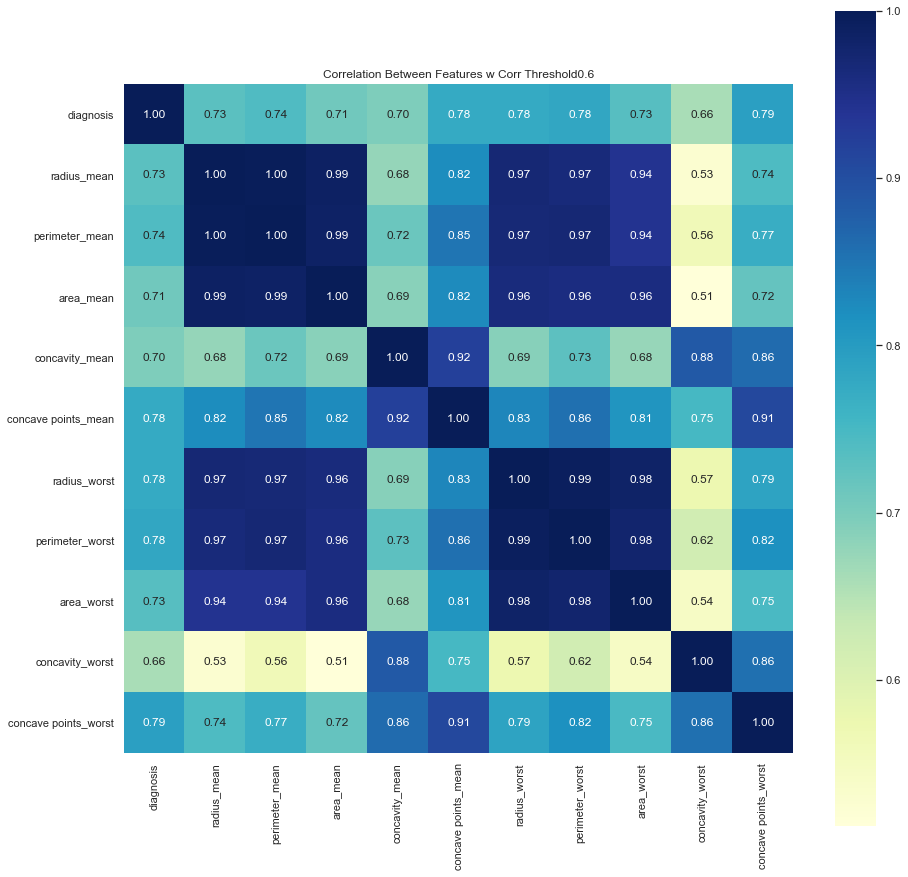

In [21]:
plt.figure(figsize =(15,15))
sns.heatmap(data.corr(),annot=True, fmt=".2f", cmap="YlGnBu", square=True)
plt.title("Correlation Between Features w Corr Threshold" + str(threshold))
plt.show()

In [22]:
#  Eventually dropping some features because they correlate with each other

#data.drop(['radius_mean'], axis=1, inplace=True)
#data.drop(['perimeter_mean'], axis=1, inplace=True)
#data.drop(['area_mean'], axis=1, inplace=True)
#data.drop(['area_worst'], axis=1, inplace=True)
#data.drop(['perimeter_worst'], axis=1, inplace=True)

#plt.figure(figsize =(15,15))
#sns.heatmap(data.corr(),annot=True, fmt=".2f", cmap="YlGnBu", square=True)
#plt.title("Correlation Between Features w Corr Threshold" + str(threshold))
#plt.show()

<Figure size 1440x1440 with 0 Axes>

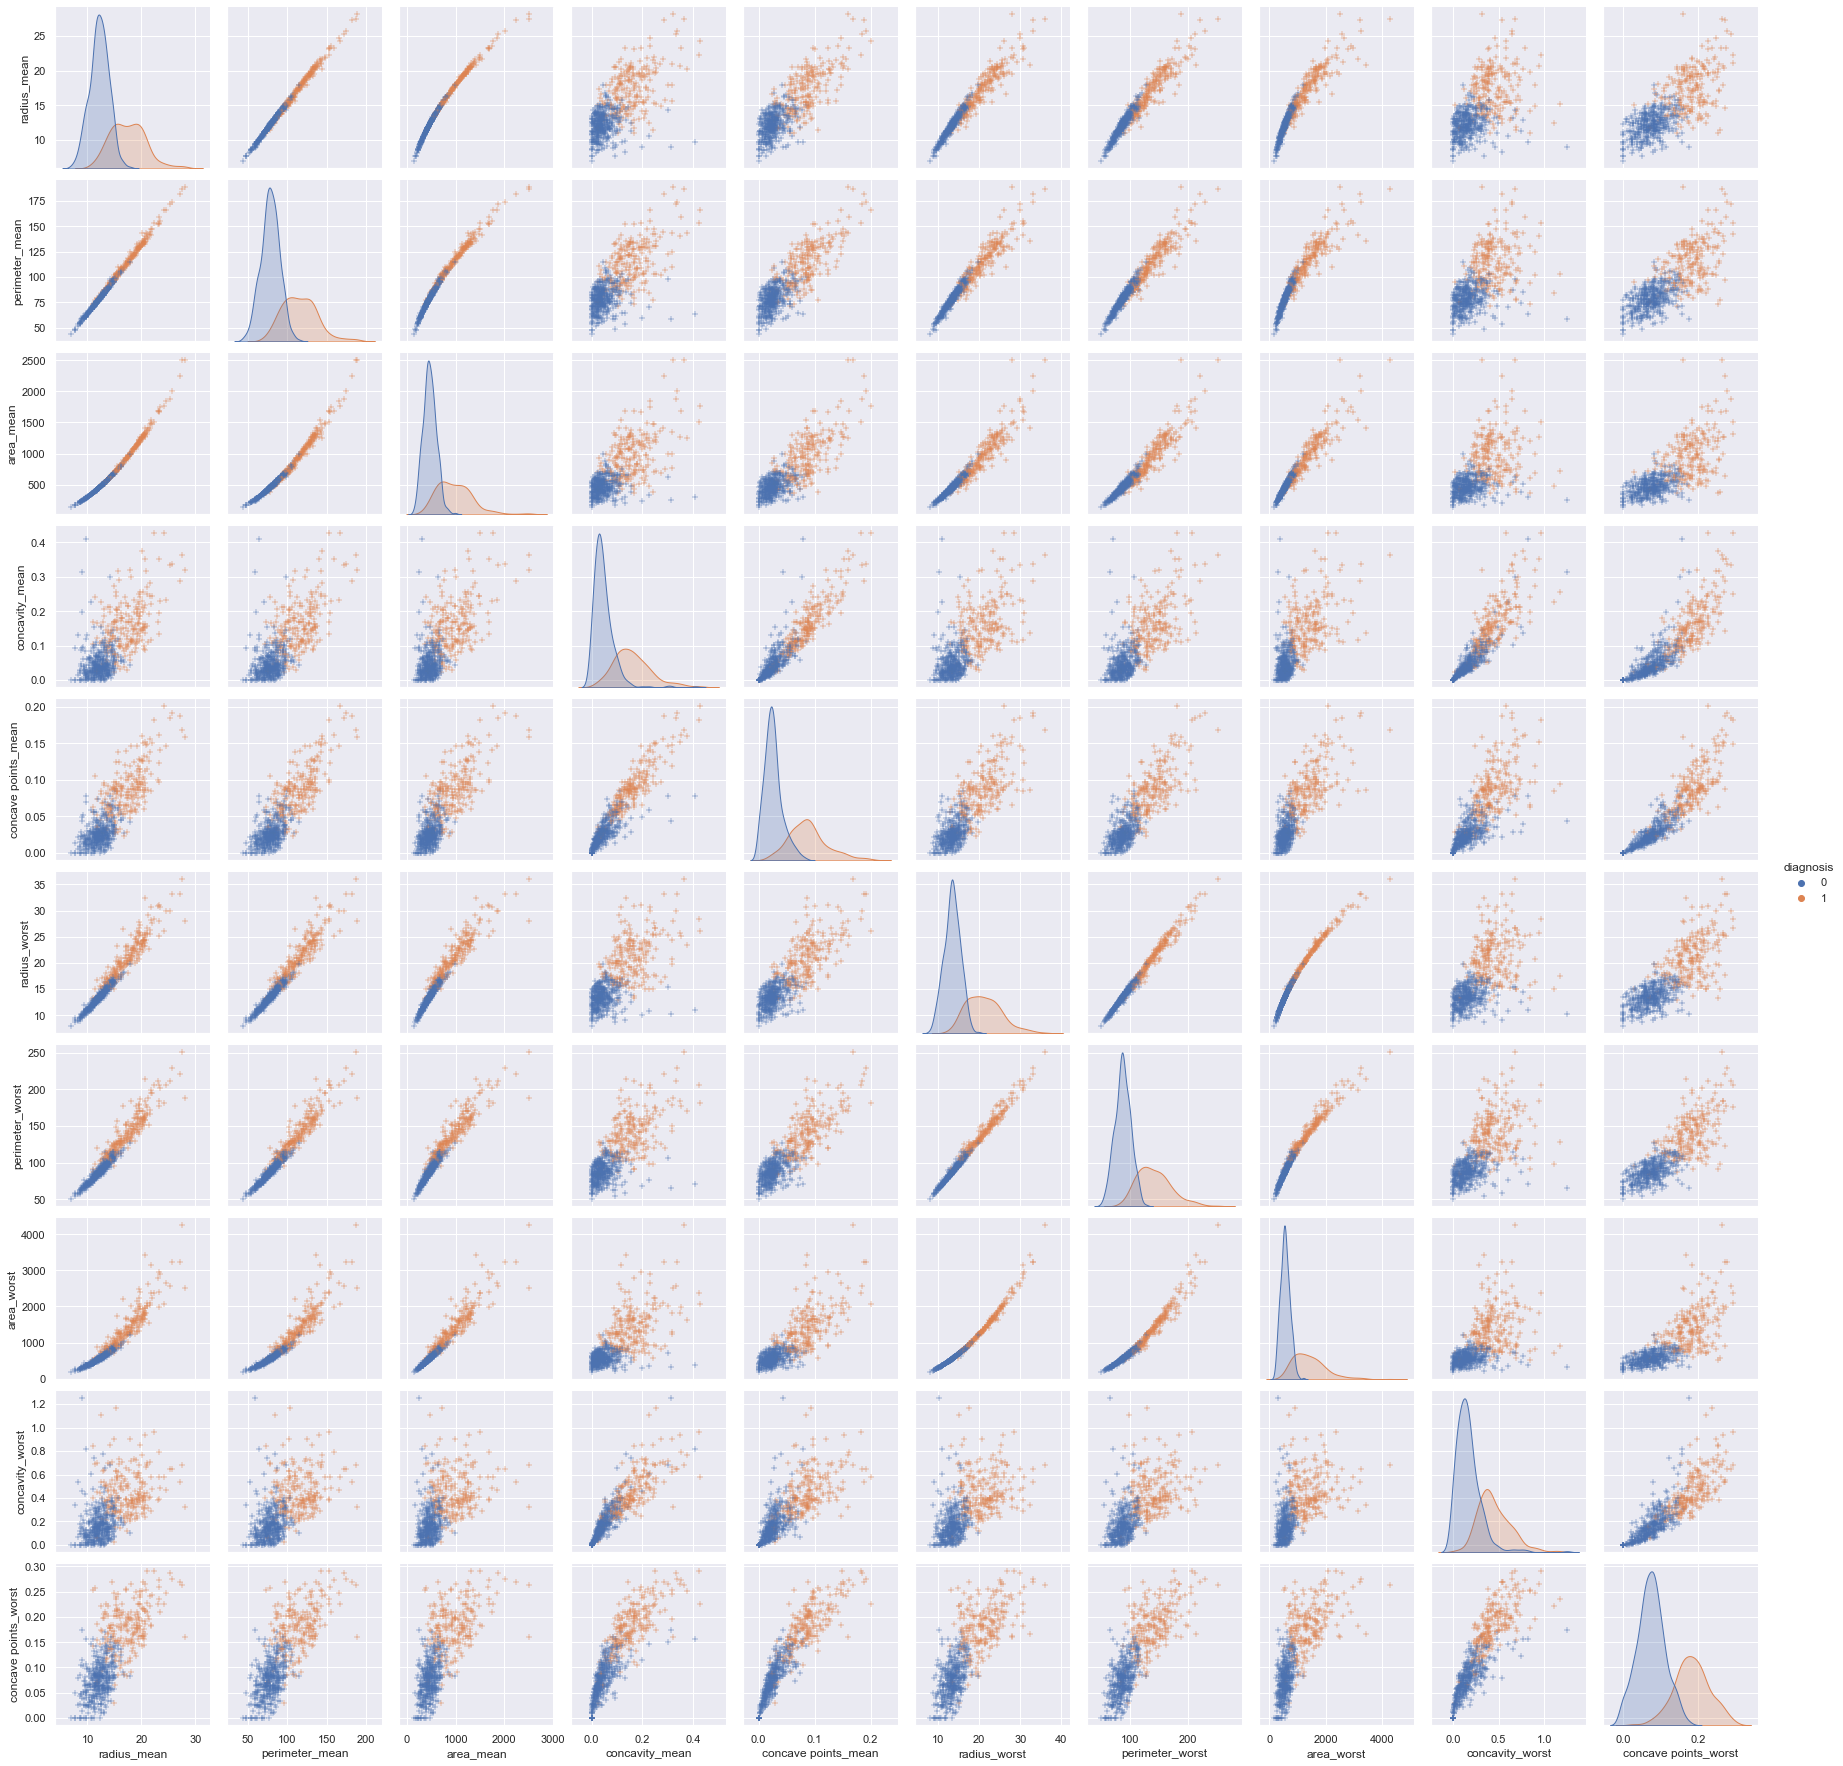

In [23]:
plt.figure(figsize =(20,20))
sns.pairplot(data, diag_kind = "kde", markers = "+", hue = "diagnosis")
plt.show()

In [24]:
Y = data['diagnosis']
X = data.drop(['diagnosis'], axis=1)

#### Remove outliers
An outlier is a variable that is more than 3 standard deviations away from the mean of a feature

In [25]:
#from scipy import stats
#
#z_scores = stats.zscore(X)
#abs_z_scores = np.abs(z_scores)
#filtered_entries = (abs_z_scores < 3).all(axis=1)
#X = X[filtered_entries]
#Y = Y[filtered_entries]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25,  random_state = 101)

In [27]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [28]:
np.max(X_train)

radius_mean               27.4200
perimeter_mean           186.9000
area_mean               2501.0000
concavity_mean             0.4268
concave points_mean        0.2012
radius_worst              36.0400
perimeter_worst          251.2000
area_worst              4254.0000
concavity_worst            1.2520
concave points_worst       0.2910
dtype: float64

### Scale Features
In order to have the ML algorithms work well, we have to scale the features.
We calculate the mean and standart deviation of the train dataset and with that values we scale both the train and test dataset.
MinMax Scaler scales to whatever range we want, for example (-1, 1).
StandardScaler scales to zero mean and unit variance.

In [29]:
method = 'MinMax'

if method == 'Standard':
    scaler = StandardScaler().fit(X_train)
elif method == 'MinMax':
    scaler = MinMaxScaler(feature_range=(0, 1)).fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
np.max(X_train)

1.0

In [31]:
def evaluation(true_label, pred_label, name):
    ''' Function for evaluating the models on the Test Dataset'''
    acc = accuracy_score(true_label, pred_label)
    recall = recall_score(true_label, pred_label)
    prec = precision_score(true_label, pred_label)
    cm = confusion_matrix(true_label, pred_label, normalize=None)
    print('Test ACC', acc)
    print('Test RECALL', recall)
    print('Test PRECISION', prec)

    plt.title(name + ' - Confusion Matrix on Test Dataset')
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.xlabel('Predicted Value')
    plt.ylabel('True Value')
    plt.show()

## Machine Learning Models

## K-Neigbours

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn_clasifier = KNeighborsClassifier(n_neighbors=2)
knn_clasifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

Test ACC 0.9370629370629371
Test RECALL 0.9090909090909091
Test PRECISION 0.9259259259259259


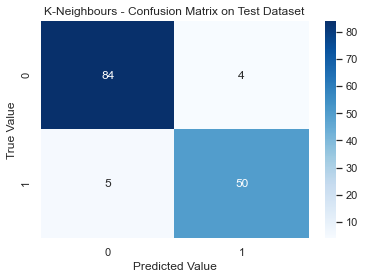

In [34]:
y_pred_test = knn_clasifier.predict(X_test)
evaluation(y_test, y_pred_test, 'K-Neighbours')

## Logistic Regression

Test ACC 0.9370629370629371
Test RECALL 0.8909090909090909
Test PRECISION 0.9423076923076923


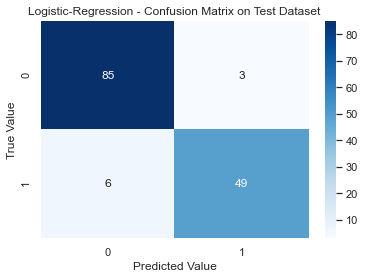

In [35]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train, y_train)

y_pred_test = logr.predict(X_test)

evaluation(y_test, y_pred_test, 'Logistic-Regression')

## GradientBoostingClassifier from sklearn

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
clf = GradientBoostingClassifier(learning_rate=0.1, n_estimators=200, max_depth=3)
clf.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200)

Test ACC 0.965034965034965
Test RECALL 0.9636363636363636
Test PRECISION 0.9464285714285714


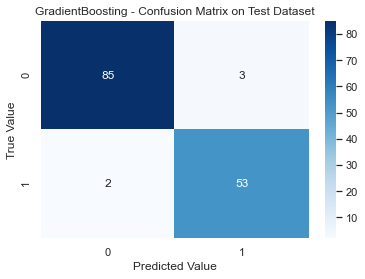

In [38]:
y_pred_test = clf.predict(X_test)
evaluation(y_test, y_pred_test, 'GradientBoosting')

### XGBoost

In [39]:
import xgboost as xgb

model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=200, max_depth=3)
model.fit(X_train, y_train)

model.score(X_train, y_train)
model.score(X_test, y_test)

0.958041958041958

Test ACC 0.958041958041958
Test RECALL 0.9636363636363636
Test PRECISION 0.9298245614035088


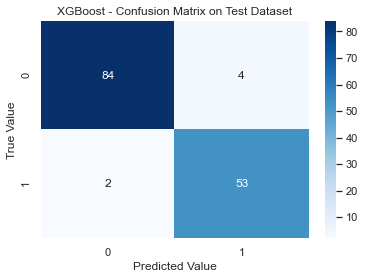

In [40]:
y_pred_test = model.predict(X_test)
evaluation(y_test, y_pred_test, 'XGBoost')

### Neural Network sklearn 

In [41]:
from sklearn.neural_network import MLPClassifier

In [42]:
clf = MLPClassifier(solver='adam', activation='relu', alpha=1e-4, hidden_layer_sizes=(200, 100, 10), random_state=1, max_iter=3000)
clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(200, 100, 10), max_iter=3000, random_state=1)

Test ACC 0.958041958041958
Test RECALL 0.9454545454545454
Test PRECISION 0.9454545454545454


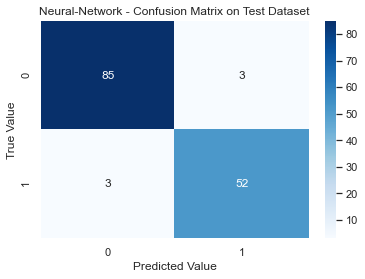

In [43]:
y_pred_test = clf.predict(X_test)
evaluation(y_test, y_pred_test, 'Neural-Network')

### Neural Network Tensorflow/ Keras

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
model = Sequential()
model.add(Dense(50,activation='selu'))
model.add(Dropout(0.5))
model.add(Dense(20,activation='selu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='tanh'))  # Binary classification the last layer has sigmoid

In [46]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['acc'])

In [47]:
earlystop = EarlyStopping(monitor='val_acc', mode='max', verbose=0, patience=25, restore_best_weights=False)

In [48]:
model.fit(x= X_train, y=y_train,
         validation_data=(X_test, y_test),
         epochs=600,
         verbose=0,
         callbacks=[earlystop])

Test ACC 0.9440559440559441
Test RECALL 1.0
Test PRECISION 0.873015873015873


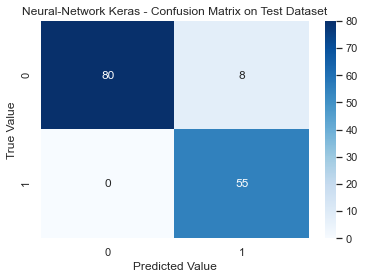

In [49]:
y_pred_test = model.predict_classes(X_test)
evaluation(y_test, y_pred_test, 'Neural-Network Keras')